In [1]:
# Step 1: Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Invistico_Airline.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert target to binary (satisfied = 1, neutral or dissatisfied = 0)
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Encode categorical features using label encoding
label_maps = {
    'Gender': {'Male': 0, 'Female': 1},
    'Customer Type': {'Loyal Customer': 1, 'disloyal Customer': 0},
    'Type of Travel': {'Business travel': 1, 'Personal Travel': 0},
    'Class': {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
}
for col, mapping in label_maps.items():
    df[col] = df[col].map(mapping)

# Move target column to the end
target = df.pop('satisfaction')
df['satisfaction'] = target

# Split into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# Train-test split (80-20)
np.random.seed(42)
indices = np.random.permutation(len(X))
split_idx = int(len(X) * 0.8)
train_idx, test_idx = indices[:split_idx], indices[split_idx:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Add intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [2]:
# Step 2: Logistic Regression Implementation 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5  # to avoid log(0)
    cost = -(1/m) * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))
    return cost[0][0]

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))
    costs = []
    for i in range(epochs):
        h = sigmoid(np.dot(X, weights))
        grad = np.dot(X.T, (h - y)) / m
        weights -= lr * grad
        cost = compute_cost(X, y, weights)
        costs.append(cost)
    return weights, costs

def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

C:\Users\MARZIA ISLAM\AppData\Local\Temp\ipykernel_34732\1601905758.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


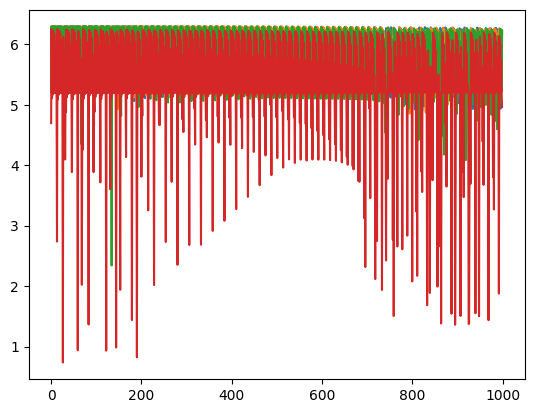

In [3]:
# Step 3: Training the Model with Multiple Learning Rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
    weights, costs = gradient_descent(X_train, y_train, lr=lr, epochs=1000)
    y_train_pred = predict(X_train, weights)
    y_test_pred = predict(X_test, weights)
    train_acc = np.mean(y_train_pred == y_train) * 100
    test_acc = np.mean(y_test_pred == y_test) * 100
    results.append((lr, train_acc, test_acc))
    plt.plot(costs, label=f"lr={lr}")

C:\Users\MARZIA ISLAM\AppData\Local\Temp\ipykernel_34732\2274761063.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


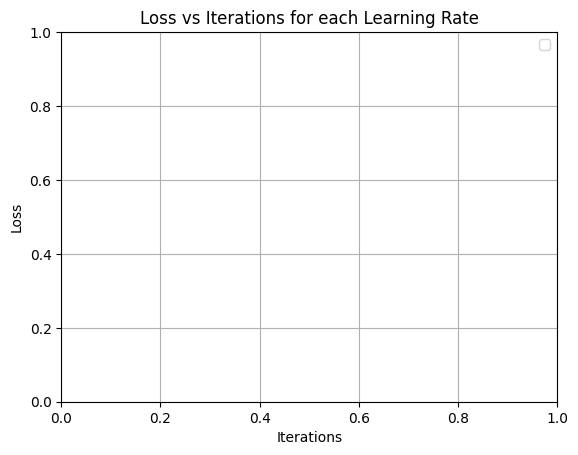

In [4]:
# Step 4: Plotting Loss vs Iterations
plt.title("Loss vs Iterations for each Learning Rate")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [5]:
# Step 5: Summary Table
print("Learning Rate\tTrain Accuracy\tTest Accuracy")
for lr, train_acc, test_acc in results:
    print(f"{lr}\t\t{train_acc:.2f}%\t\t\t{test_acc:.2f}%")

Learning Rate	Train Accuracy	Test Accuracy
0.1		45.92%			45.65%
0.01		46.10%			45.82%
0.001		45.89%			45.60%
0.0001		49.41%			49.19%
